#**CS  396 Final - Utilizing AI to visualize Climate Change data**

This document is a reference on how to create a tool that allows for the visualization of multiple climate-related datasets, and prediction of future weather trends. I will do this by utilizing various visualization and machine learning techniques to visualize the results and machine learning algorithms to predict future results. This final provides two visualizations and ML approaches to climate change visualization by using Surface Temperature and Ocean Level Variability. This multipurpose approach provides a richer understanding of climate dynamics in multiple areas and aids in the development of strategies for mitigating climate change impacts.
  


In [21]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
!pip install cartopy
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
!pip install xarray
import xarray as xr

#Import dataset

xr_df = xr.open_dataset('/content/gistemp1200_GHCNv4_ERSSTv5.nc') #This file can be found included in the submission.
xr_df

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1732, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2024-04-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2024-05-08 14:48:06 by SBBX_to_nc 2.0 - ILAND=1200,...

# In these plots I graph the temperature change over only a 40 year span, the years can be changed in the years array at the bottom.

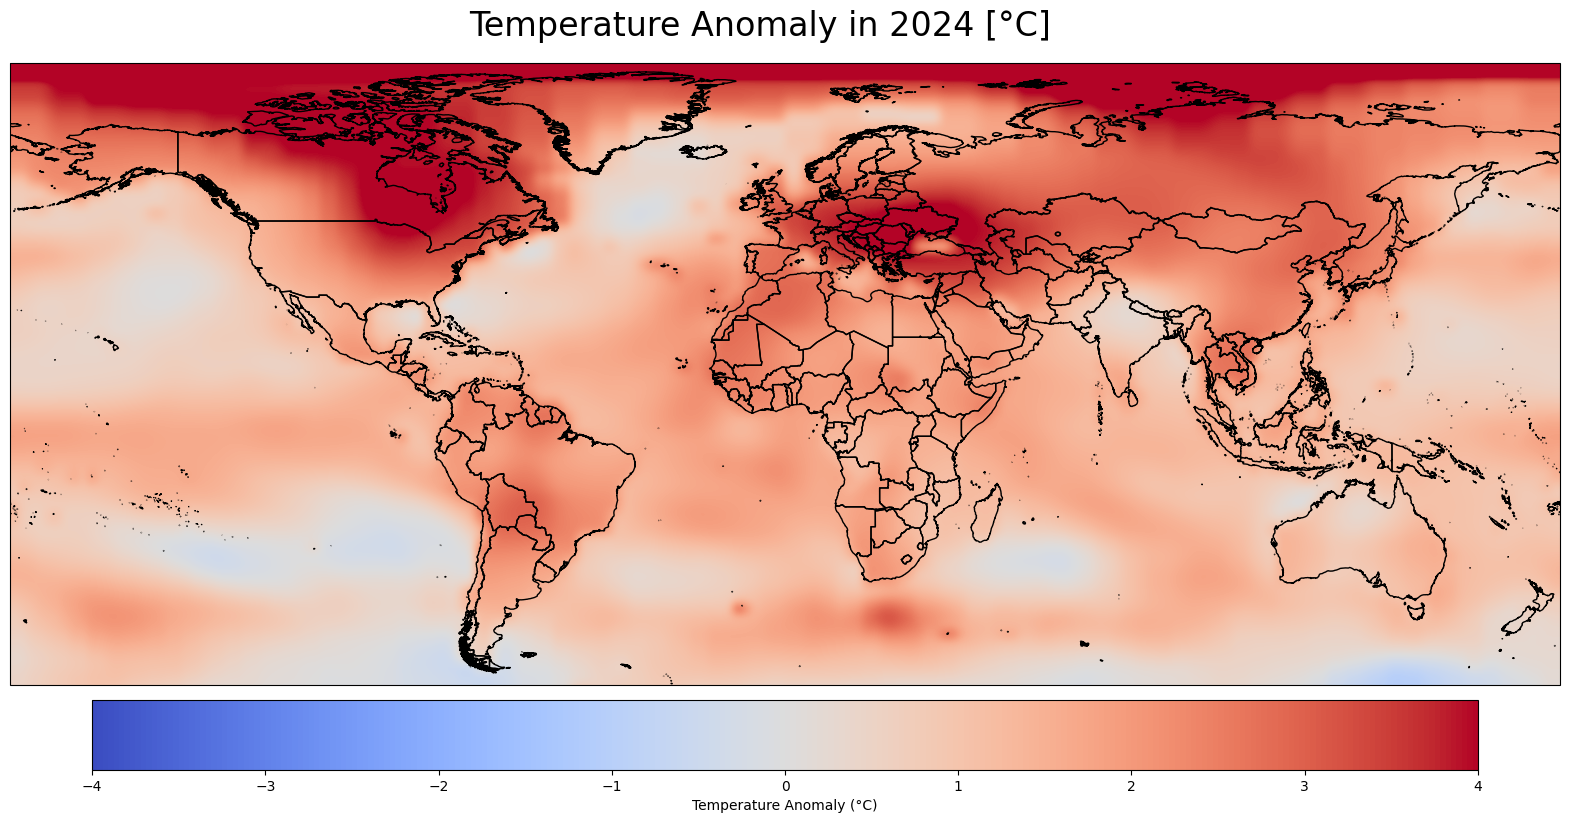

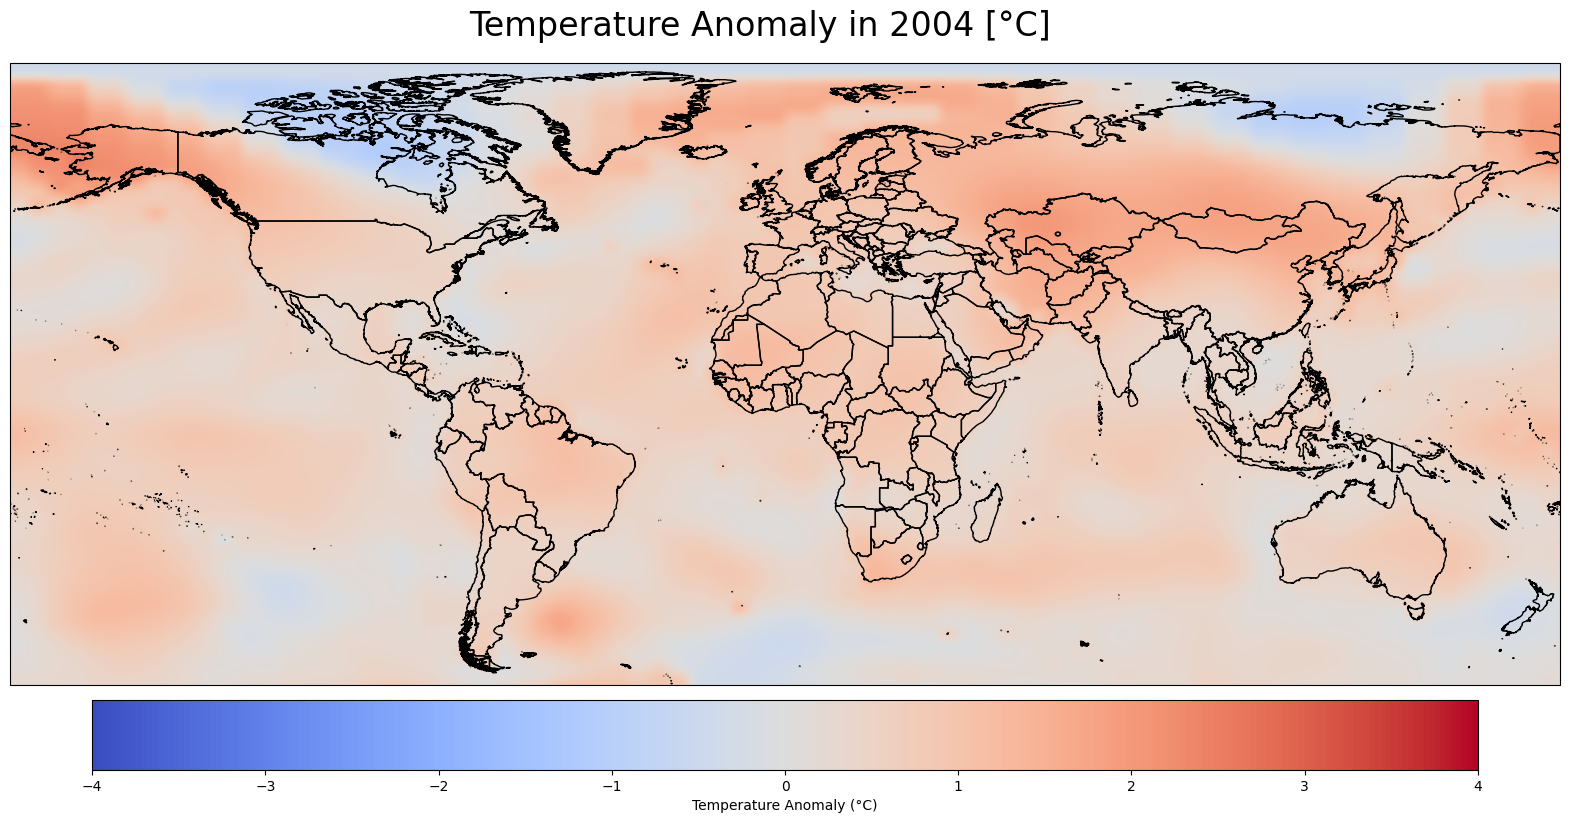

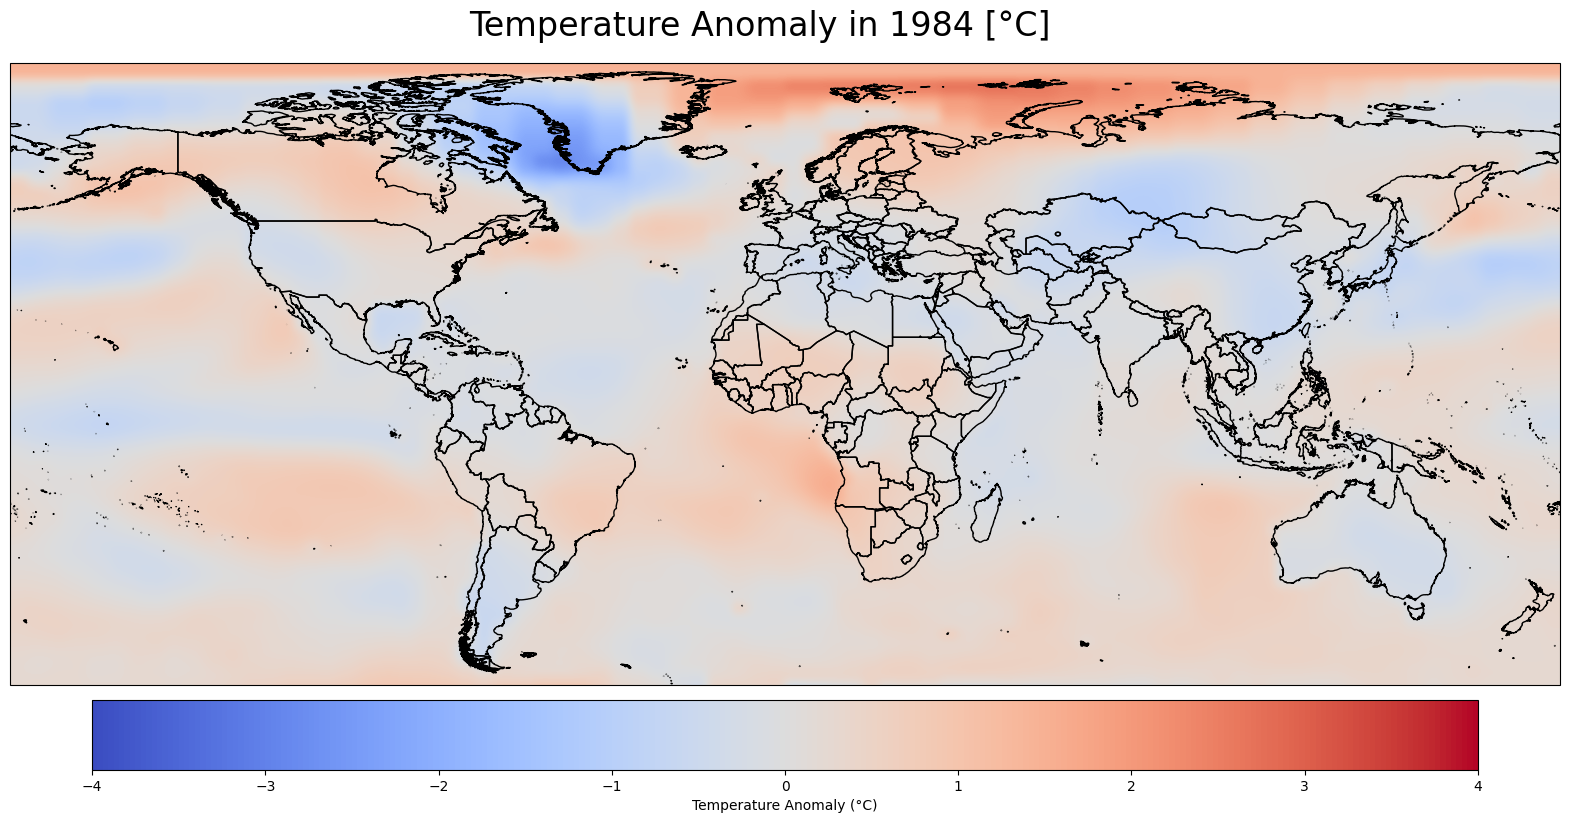

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import xarray as xr

def plot_temperature_variability(year, anomaly, cbar_kwargs):
    # Create a figure with a specified size
    fig = plt.figure(figsize=(20, 20))
    fig.suptitle(f"Temperature Anomaly in {year} [°C]",y=.49 , fontsize = 24)
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) # Add a subplot with a Plate Carree projection  (good for gloabl projections)
    ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'), facecolor='none', edgecolor='black')
    ax.set_extent([-150, 150, -55, 85])

    #ax.set_title(f"Temperature Anomaly in {year} [°C]")

    # Select the data for the specific year
    anomaly_year = anomaly.sel(time=str(year))

    # Ensure that the data is a 2D array by selecting a specific time slice
    anomaly_2d = anomaly_year.squeeze()

    anomaly_2d.plot.imshow(ax=ax, add_labels=False, add_colorbar=True, vmin=-4, vmax=4, cmap='coolwarm', cbar_kwargs=cbar_kwargs, interpolation='bicubic')

    plt.savefig(f"global_map_{year}.png", bbox_inches='tight', dpi=150)
    plt.show()

# Load your data
climate = xr_df.resample(time='Y').mean()
anomaly = climate['tempanomaly']

cbar_kwargs = {
    'orientation': 'horizontal',
    'fraction': 0.045,
    'pad': 0.01,
    'extend': 'neither',
    'label': 'Temperature Anomaly (°C)'
}

# Query the years 2024, 2014, and 2004
years = [2024, 2004, 1984]
for year in years:
    plot_temperature_variability(year, anomaly, cbar_kwargs)

# Here I take a step closer and plot the European temperature change. The effects of temperature change more focused in this region due to industrialization

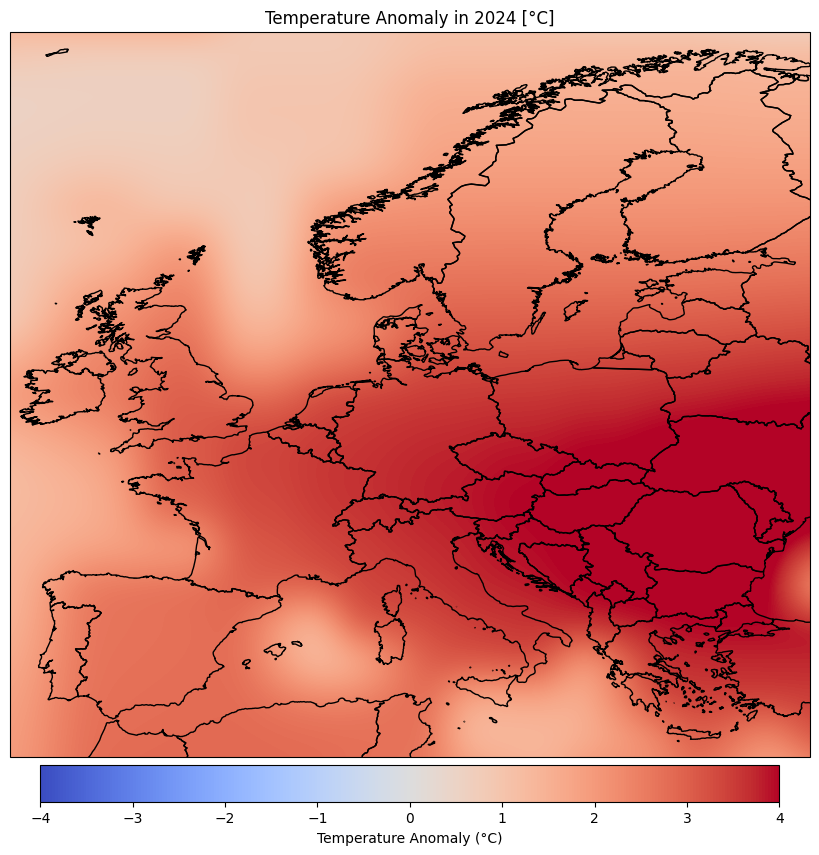

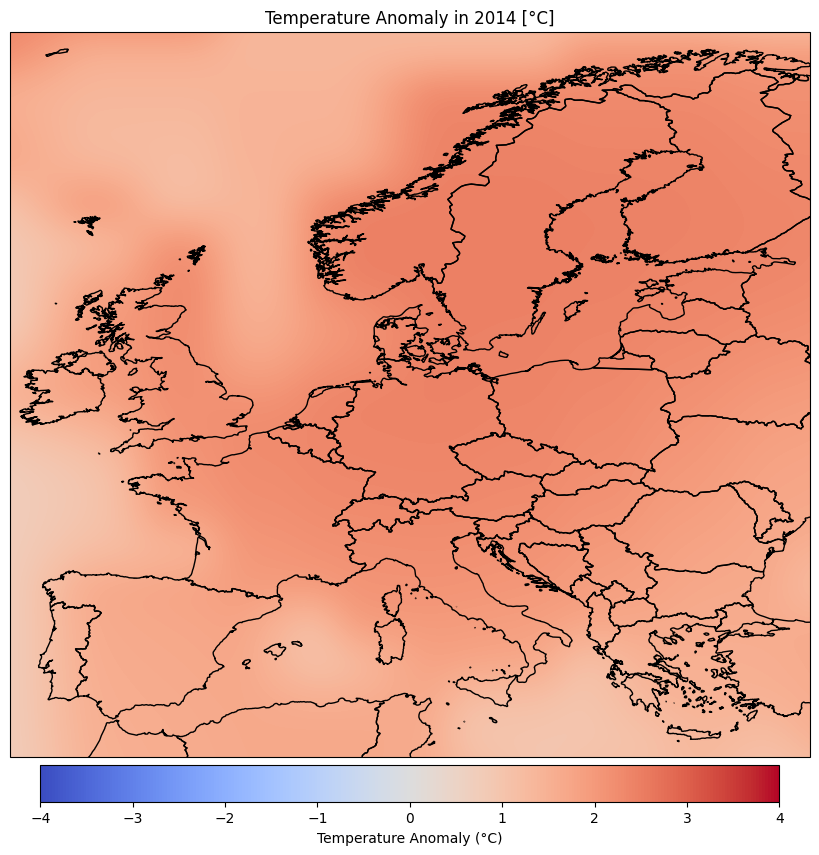

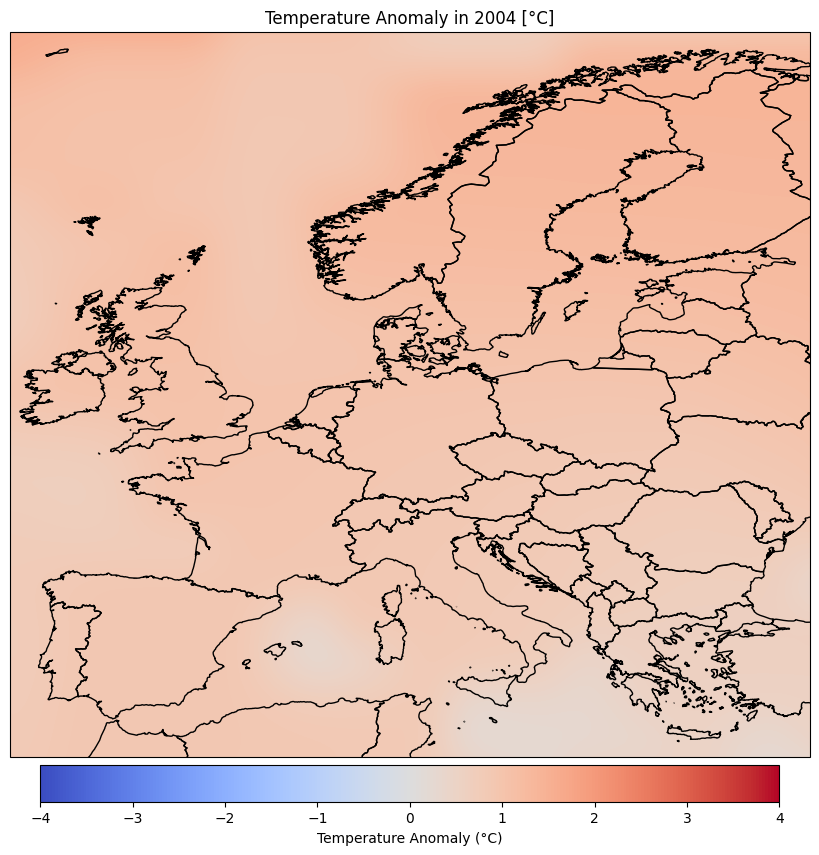

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import xarray as xr


#Plot the european temperature at amore specific scope
def plot_european_temperature_variability(year, anomaly, cbar_kwargs):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'), facecolor='none', edgecolor='black')
    ax.set_extent([-11, 31, 34, 71])

    ax.set_title(f"Temperature Anomaly in {year} [°C]")

    # Select the data for the specific year
    anomaly_year = anomaly.sel(time=str(year))

    # Ensure that the data is a 2D array by testing a specific slice
    anomaly_2d = anomaly_year.squeeze()

    xr.plot.imshow(anomaly_2d, ax=ax, add_labels=False, vmin=-4, vmax=4, cmap='coolwarm',cbar_kwargs=cbar_kwargs, interpolation='bicubic')
    plt.savefig(f"european_map_{year}.png", bbox_inches='tight', dpi=150)
    plt.show()

# Load your data
climate = xr_df.resample(time='Y').mean()
anomaly = climate['tempanomaly']

cbar_kwargs = {
    'orientation': 'horizontal',
    'fraction': 0.048,
    'pad': 0.01,
    'extend': 'neither',
    'label': 'Temperature Anomaly (°C)'
}

# Query the years 2024, 2014, and 2004
years = [2024, 2014, 2004]
for year in years:
    plot_european_temperature_variability(year, anomaly, cbar_kwargs)

# Here I create an MP4 to show the temperature change from 1954, you ca nedit it in the new year arrary.

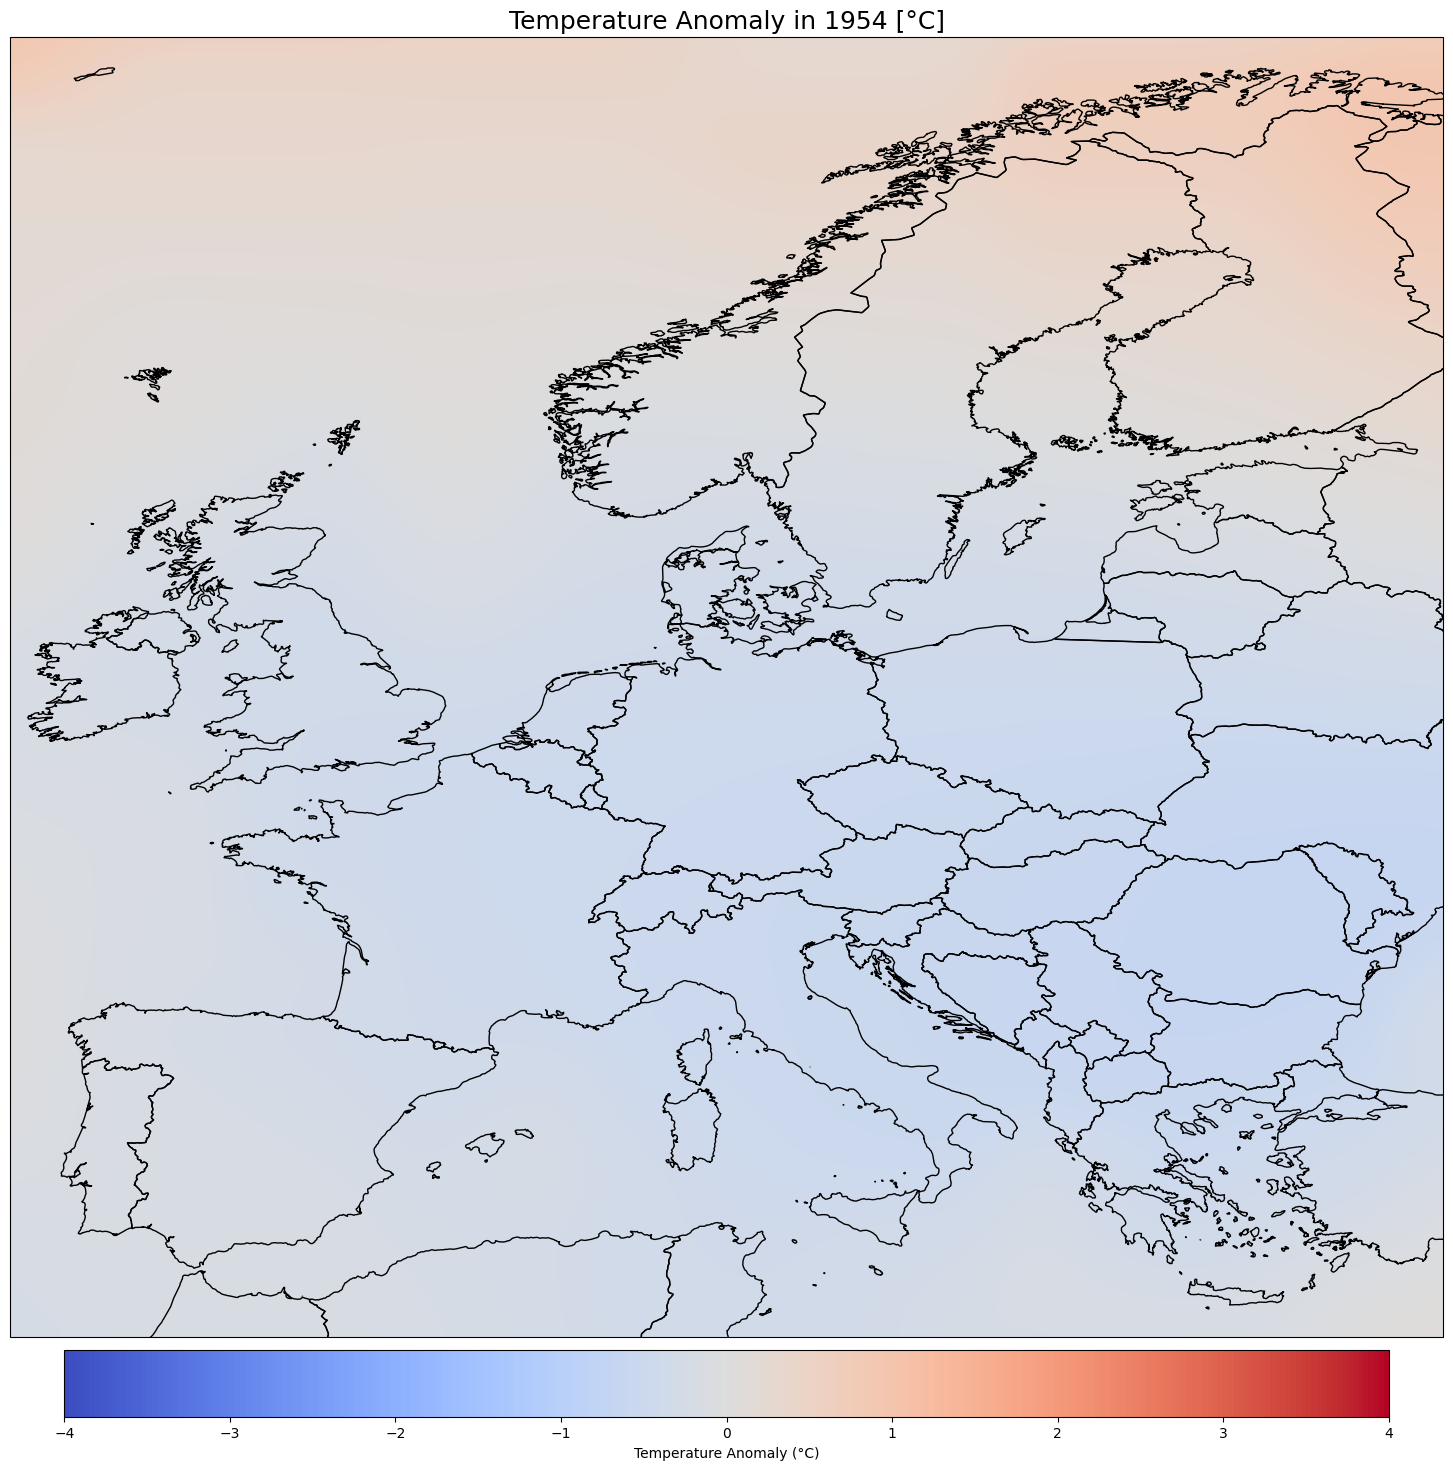

In [20]:
#Here I create
#Creating an animation for 1950-2020 in europe and saving it as an MP4 video.
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.048,
    'pad': 0.01,
    'extend':'neither',
    'label': 'Temperature Anomaly (°C)'
}

year = [1954]

# Create a figure for the animation
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(left=0.02, bottom=0.04, right=0.98, top=0.96)
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'), facecolor='none', edgecolor='black')
ax.set_extent([-11, 31, 34, 71])

image = anomaly.isel(time=0).plot.imshow(ax=ax, add_labels=False, vmin=-4, vmax=4, cmap='coolwarm', animated=True, cbar_kwargs=cbar_kwargs, interpolation='bicubic')

# Define the animation function
def animate(t):
    date =  pd.to_datetime(anomaly.sel(time=t)['time'].values)
    ax.set_title("Temperature Anomaly in " + str(date.year) + " [°C]")
    ax.title.set_fontsize(18)
    image.set_array(anomaly.sel(time=t))
    return image

ani = FuncAnimation(fig, animate, frames=anomaly['time'].values[-71:], blit=False)
ani.save("animation.mp4", fps=2, extra_args=['-vcodec','libx264', '-crf','15', '-preset','veryslow']) #Supposed to save as mp4 but the animation is kind of blurry.


# Sea Level Rising Predictor:
Climate change and its effect to sea condition is a hot topic on environmental condition in the world. While the sea level increase is not visible by our eyes, the impact can be felt by people who live near the sea. The impact of sea level rise get multiplicated especially if coupled with the occurence of land subsidence. While the land subsidence happens because of groundwater consumption, sea level rise happens because of temperature increase on our atmosphere.



In [24]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import linregress

import warnings
warnings.filterwarnings('ignore')


#Here we simply plot the sea level data from the EPA

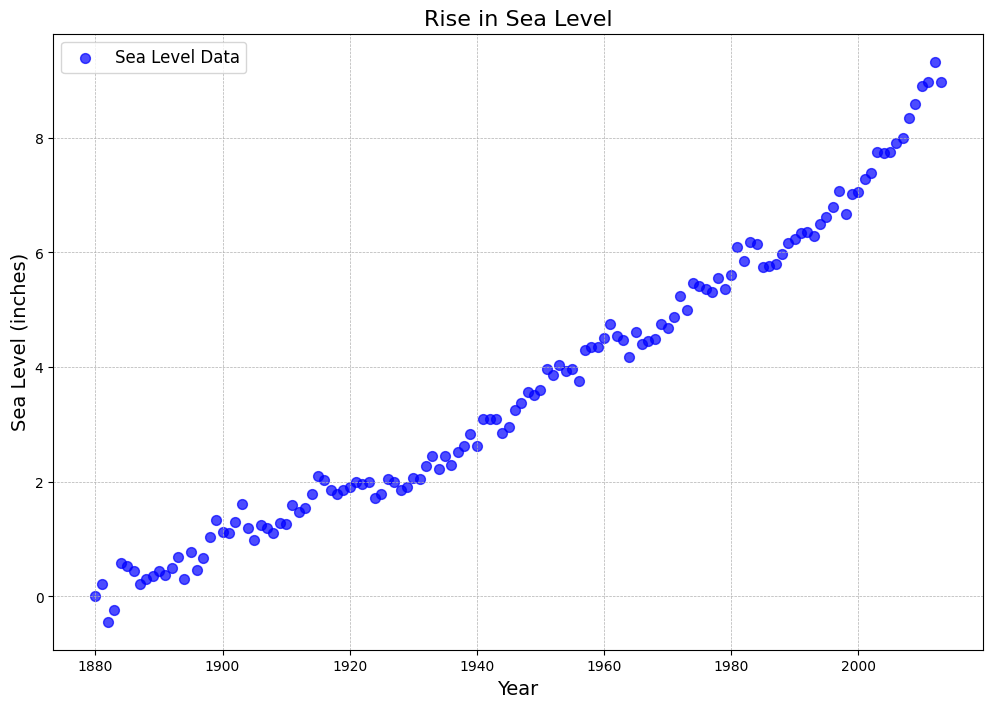

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

def draw_plot():
    # Read data from file
    sea_lvl = pd.read_csv("epa-sea-level.csv")
    x = sea_lvl['Year']
    y = sea_lvl['CSIRO Adjusted Sea Level']

    # Create scatter plot
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.scatter(x, y, label='Sea Level Data', color='blue', s=50, alpha=0.7)


    # Add labels and title
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Sea Level (inches)', fontsize=14)
    plt.title('Rise in Sea Level', fontsize=16)

    # Add gridlines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Add legend
    plt.legend(fontsize=12)

    # Show plot
    plt.show()

draw_plot()

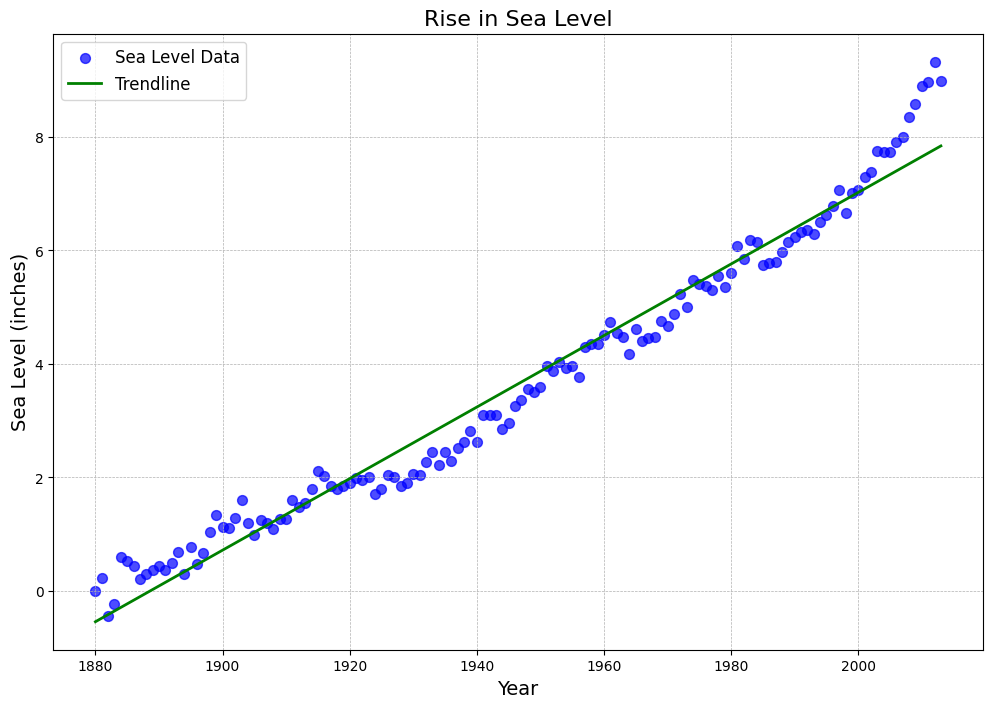

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

def draw_plot():
    # Read data from file
    sea_lvl = pd.read_csv("epa-sea-level.csv")
    x = sea_lvl['Year']
    y = sea_lvl['CSIRO Adjusted Sea Level']

    # Create scatter plot
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.scatter(x, y, label='Sea Level Data', color='blue', s=50, alpha=0.7)

    # Fit line to entire dataset
    res_all = linregress(x, y)
    x_pred_all = np.linspace(x.min(), x.max(), 1000)
    y_pred_all = res_all.slope * x_pred_all + res_all.intercept
    plt.plot(x_pred_all, y_pred_all, color='green', linewidth=2, label='Trendline')

    # Add labels and title
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Sea Level (inches)', fontsize=14)
    plt.title('Rise in Sea Level', fontsize=16)

    # Add gridlines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Add legend
    plt.legend(fontsize=12)

    # Show plot
    plt.show()

draw_plot()


#Use pre trained linear regreession model to predict progress into 2050 (data stopped in 2000)

In [29]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import linregress
!pip install plotly

def draw_plot_interactive():
    # Read data from file
    sea_lvl = pd.read_csv("epa-sea-level.csv")
    x = sea_lvl['Year']
    y = sea_lvl['CSIRO Adjusted Sea Level']

    # Create scatter plot
    fig = px.scatter(sea_lvl, x='Year', y='CSIRO Adjusted Sea Level', title='Rise in Sea Level')

    # Create first line of best fit
    res = linregress(x, y)
    x_pred = pd.Series([i for i in range(1880, 2051)])
    y_pred = res.slope * x_pred + res.intercept
    fig.add_trace(go.Scatter(x=x_pred, y=y_pred, mode='lines', name='Best Fit Line (1880-2000)', line=dict(color='green')))

    # Create second line of best fit projecting results into 2050.
    new_sea_lvl = sea_lvl.loc[sea_lvl['Year'] >= 2000]
    new_x = new_sea_lvl['Year']
    new_y = new_sea_lvl['CSIRO Adjusted Sea Level']
    new_res = linregress(new_x, new_y)
    x_pred_t = pd.Series([i for i in range(2000, 2051)])
    y_pred_t = new_res.slope * x_pred_t + new_res.intercept
    fig.add_trace(go.Scatter(x=x_pred_t, y=y_pred_t, mode='lines', name='Best Fit Line (2000-2050)', line=dict(color='red')))

    # Update layout for better visualization
    fig.update_layout(xaxis_title='Year', yaxis_title='Sea Level (inches)', legend_title_text='Legend')

    # Show plot
    fig.show()

draw_plot_interactive()